# Exploratory data analysis of Titanic dataset.

Let's import all the necessary packages that we need. Below the code cells are the description of why a particular code is written. And what output can we extract from the cell. Let's start to unravel the mystery!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the train.csv and assign it to the variable for dataframe

In [2]:
train_data = pd.read_csv("titanic/train.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now, take a glimpse at what the training dataset looks like. It has Passenger ID, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked as columns/features. Out of these columns Survived is label data (output data), while the rest or part of rest act as features for a machine learning model. We will talk about them later down the road.

Moving down further we will see what each column means.

In [4]:
train_data.shape

(891, 12)

The shape of the train dataset is 891 X 12(rows X columns)

In [5]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Using value_counts() of pandas, we can see that the number of survived (342) are less than those who died (549).

### Missing data

In [6]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


It's now time to find out whether there is any missing data (NaN) in the dataset. Its difficult to find the missing data out of all this data. So lets create a heatmap representation of missing data.

<AxesSubplot:>

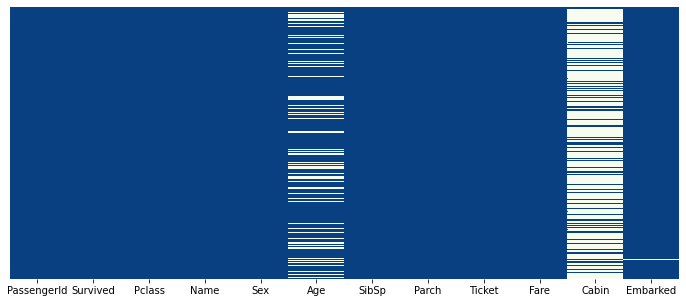

In [7]:
plt.figure(figsize=(12,5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="GnBu_r")

The white lines represent the missing data in the dataset. We can see Age, Cabin and Embarked columns have missing values. With Embarked having the least missing values.

Calculated the number of missing values in a column.

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin column has 77% of missing values, Age has nearly 20% of missing values and Embarked has 0.2% only.

In [9]:
train_data.isnull().sum()/len(train_data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Different values under Pclass feature. Each represent how many passengers were in them.

In [11]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
base_color = sns.color_palette()[0]

Text(0, 0.5, 'Frequency')

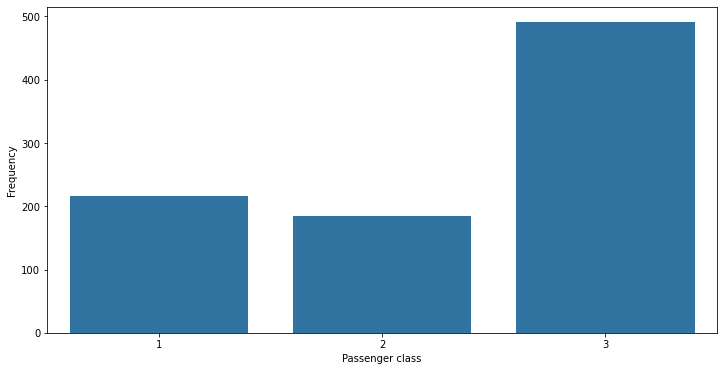

In [13]:
plt.figure(figsize =(12, 6))
sns.countplot(data=train_data, x="Pclass", color = base_color)

plt.xlabel('Passenger class')
plt.ylabel('Frequency')

There were 577 male and 314 female passengers.

In [14]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0, 0.5, 'Frequency')

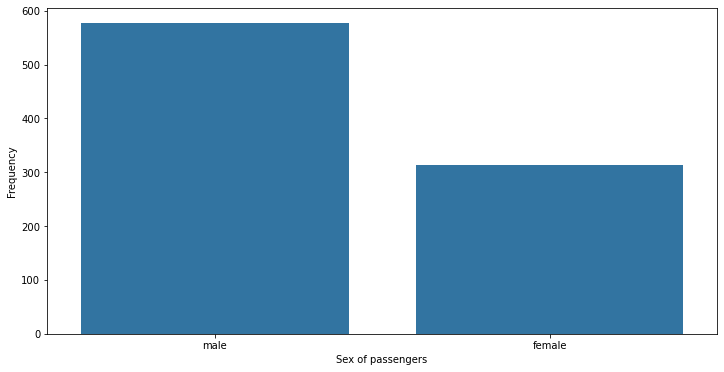

In [15]:
plt.figure(figsize =(12, 6))
sns.countplot(data=train_data, x="Sex", color = base_color)

plt.xlabel('Sex of passengers')
plt.ylabel('Frequency')

In [16]:
train_data["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [17]:
train_data["Age"].nunique()

88

There are 891 passengers whose age are divided under 88 different values.

Text(0, 0.5, 'Frequency')

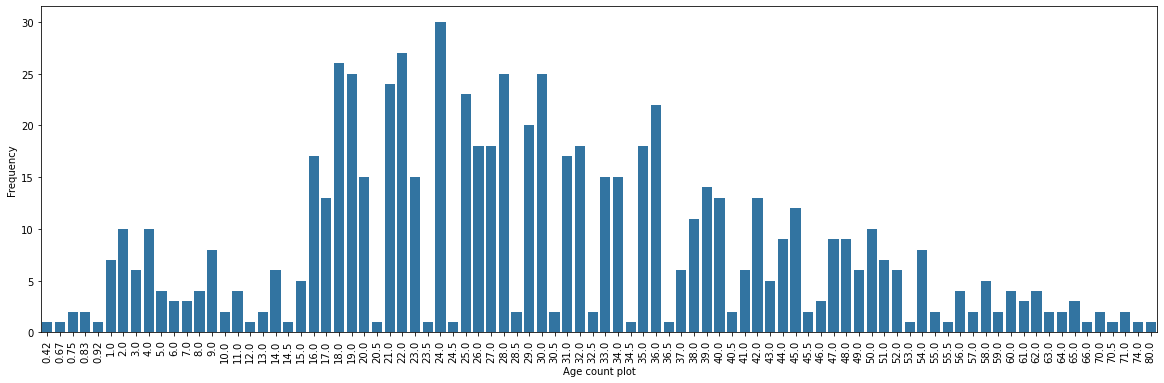

In [18]:
plt.figure(figsize =(20, 6))
sns.countplot(data=train_data, x="Age", color = base_color)

plt.xticks(rotation=90)
plt.xlabel('Age count plot')
plt.ylabel('Frequency')

Data about how many passengers have siblings/spouse with them.

In [19]:
train_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

608 number of people had no siblings/spouse

Text(0, 0.5, 'Frequency')

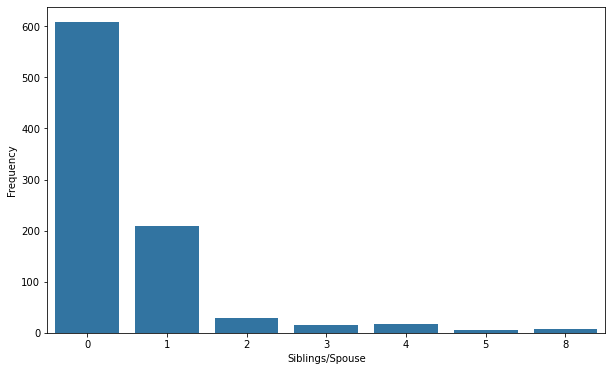

In [20]:
plt.figure(figsize =(10, 6))
sns.countplot(data=train_data, x="SibSp", color = base_color)

plt.xlabel('Siblings/Spouse')
plt.ylabel('Frequency')

Data about how many passengers have parent/child with them.

In [21]:
train_data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

678 number of people had no parent/child.

Text(0, 0.5, 'Frequency')

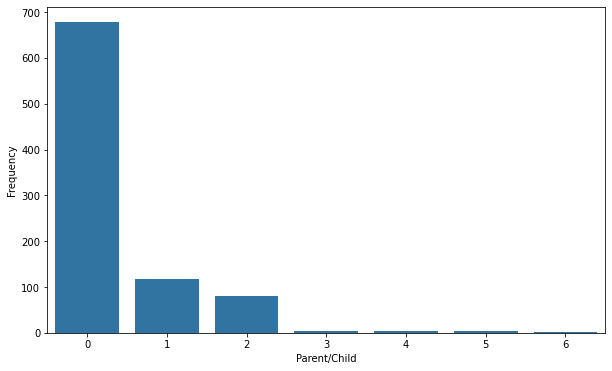

In [22]:
plt.figure(figsize =(10, 6))
sns.countplot(data=train_data, x="Parch", color = base_color)

plt.xlabel('Parent/Child')
plt.ylabel('Frequency')

This represents how different people had tickets. Like,
- 7 people had 1601 named ticket.
- 7 people had CA. 2343 named ticket.
- 1 person had 237442 named ticket, and so on.

In [23]:
train_data["Ticket"].value_counts()

347082               7
CA. 2343             7
1601                 7
CA 2144              6
347088               6
                    ..
13213                1
26707                1
248740               1
STON/O 2. 3101275    1
392091               1
Name: Ticket, Length: 681, dtype: int64

This data represents how passengers ticket sold.
- Say 43 people paid for 8.0500 ticket.
- 42 people paid for 13.00 ticket.
- There was a person who paid 17.40 ticket for himself.

In [24]:
train_data["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

A total of 147 different cabin are kept for 891 passengers.

In [25]:
train_data["Cabin"].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
C22 C26        3
              ..
D28            1
C104           1
D9             1
E58            1
C87            1
Name: Cabin, Length: 147, dtype: int64

Represents how many passengers embared from where.

In [26]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Text(0, 0.5, 'Frequency')

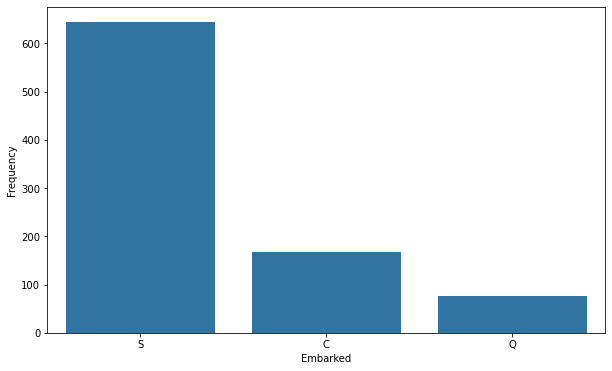

In [27]:
plt.figure(figsize =(10, 6))
sns.countplot(data=train_data, x="Embarked", color = base_color)

plt.xlabel('Embarked')
plt.ylabel('Frequency')

Total cost of tickets for 1 class, 2 class, 3 class

In [28]:
fare_collection = train_data.groupby(["Pclass"])["Fare"].sum()
fare_collection

Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64

Text(0, 0.5, 'Frequency')

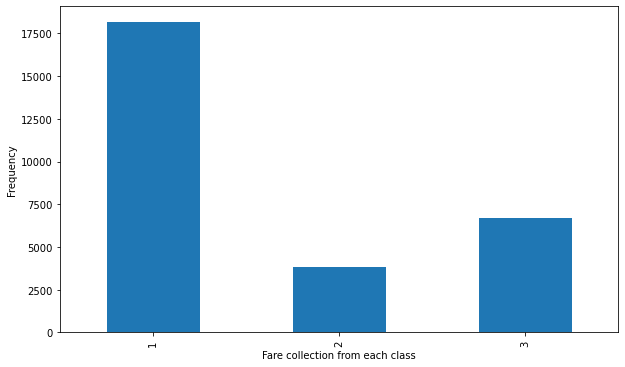

In [29]:
plt.figure(figsize =(10, 6))

fare_collection.plot(kind="bar")

plt.xlabel('Fare collection from each class')
plt.ylabel('Frequency')

Total cost of tickets sold.

In [30]:
train_data["Fare"].sum()

28693.9493

Total cost of tickets from each embarked stations S, C, Q.

Here we are plotting graph based on Embarked station and Class type(1,2,3) to see the amount collected.

In [31]:
pclass_embarked_FC = train_data.groupby(["Embarked", "Pclass"])["Fare"].sum()
pclass_embarked_FC

Embarked  Pclass
C         1         8901.0750
          2          431.0917
          3          740.1295
Q         1          180.0000
          2           37.0500
          3          805.2043
S         1         8936.3375
          2         3333.7000
          3         5169.3613
Name: Fare, dtype: float64

Text(0, 0.5, 'Frequency')

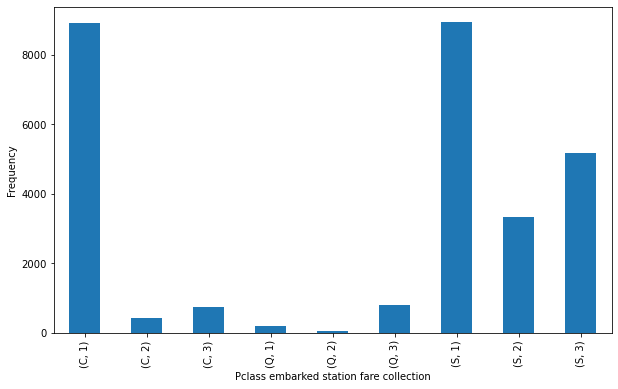

In [32]:
plt.figure(figsize =(10, 6))

pclass_embarked_FC.plot(kind="bar")

plt.xlabel('Pclass embarked station fare collection')
plt.ylabel('Frequency')

Below shows the plot of fare collected from each Embarked station.

In [33]:
embarked_fare_collection = train_data.groupby(["Embarked"])["Fare"].sum()
embarked_fare_collection

Embarked
C    10072.2962
Q     1022.2543
S    17439.3988
Name: Fare, dtype: float64

Text(0, 0.5, 'Frequency')

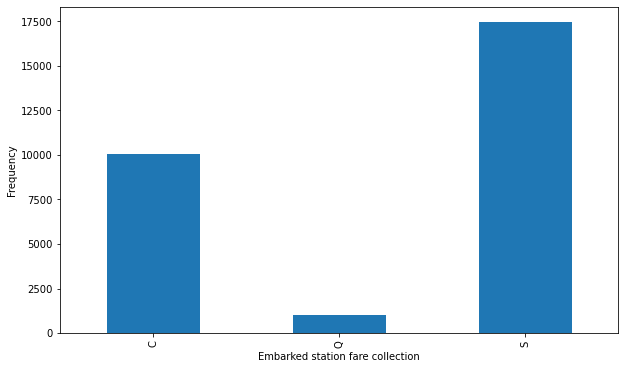

In [34]:
plt.figure(figsize =(10, 6))

embarked_fare_collection.plot(kind="bar")

plt.xlabel('Embarked station fare collection')
plt.ylabel('Frequency')

Fare for each cabin with respect to class.

In [35]:
train_data.groupby(["Pclass", "Cabin"])["Fare"].sum()

Pclass  Cabin
1       A10      40.1250
        A14      52.0000
        A16      39.6000
        A19      26.0000
        A20      56.9292
                  ...   
3       F E69    22.3583
        F G63     7.6500
        F G73    15.3000
        F38       7.7500
        G6       54.3250
Name: Fare, Length: 147, dtype: float64

Fare for each ticket.

In [36]:
train_data.groupby(["Ticket"])["Fare"].sum()

Ticket
110152         259.500
110413         238.950
110465         104.000
110564          26.550
110813          75.250
                ...   
W./C. 6608     137.500
W./C. 6609       7.550
W.E.P. 5734     61.175
W/C 14208       10.500
WE/P 5735      142.000
Name: Fare, Length: 681, dtype: float64

Average age of Female and Male on ship.

In [37]:
train_data.groupby(["Sex"])["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [38]:
train_data.groupby(["Embarked"])["Fare"].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

The average cost of ticket was lowest for people who embarked from Q, then for people from S and maximum fare was for people from C.

Average cost of ticket class-wise, with average fare paid by each female/male.

In [39]:
train_data.groupby(["Pclass","Sex"])["Fare"].mean()

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

Average cost of ticket per class.

In [40]:
train_data.groupby(["Pclass"])["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Number of males/females divided in each class.

In [41]:
train_data.groupby(["Pclass"])["Sex"].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

- On combining the results gathered from above queries we can say 1st class has highest number of males(122) with average fare cost to them 67.22, females in 1st class were 94 with average fare cost to them 106.12.

- In the 2nd class total males were 108 with average fare cost to them 19.74 and females were 76 with average fare cost to them 21.97

- In the 3rd class total males were 347 with average fare cost to them 12.66 and females were 144 with average fare cost to them 16.11

In [42]:
train_data.groupby(["Pclass", "Sex"])["Fare"].agg(["max", "min"])

max      min
Pclass Sex                      
1      female  512.3292  25.9292
       male    512.3292   0.0000
2      female   65.0000  10.5000
       male     73.5000   0.0000
3      female   69.5500   6.7500
       male     69.5500   0.0000

A more detailed look into what maximum/minimum amount was paid by female/male for each classes.

Here we can see in each class with either male/female passenger what is the mean fare if they had any parent/child.

In [43]:
train_data.groupby(["Pclass", "Sex", "Parch"])["Fare"].mean()

Pclass  Sex     Parch
1       female  0         95.302930
                1        111.252206
                2        152.703846
        male    0         51.403325
                1        119.827979
                2        146.508325
                4        263.000000
2       female  0         16.873796
                1         27.444444
                2         34.059855
                3         20.875000
        male    0         17.767134
                1         27.821729
                2         32.266680
3       female  0         10.207652
                1         17.358000
                2         29.540996
                3         26.816650
                4         24.487500
                5         32.868750
                6         46.900000
        male    0          9.970506
                1         21.116393
                2         39.737500
                3         34.375000
                4         27.900000
                5         31.275000
Name: 

Here we can see in each class with either male/female passenger what is the mean fare if they had any siblings/spouse

In [44]:
train_data.groupby(["Pclass", "Sex", "SibSp"])["Fare"].mean()

Pclass  Sex     SibSp
1       female  0        105.431292
                1         92.686563
                2        192.076400
                3        263.000000
        male    0         58.403028
                1         83.079710
                2        111.825000
                3        263.000000
2       female  0         16.304357
                1         30.235268
                2         28.250000
                3         21.000000
        male    0         15.085362
                1         26.467593
                2         54.200000
3       female  0         10.625826
                1         17.959979
                2         23.967843
                3         23.775013
                4         27.402083
                5         46.900000
                8         69.550000
        male    0          9.594749
                1         15.559449
                2         15.712500
                3         25.585425
                4         34.082292
      

In [45]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


During observation from problem definition that Sex=female had very high survival rate at 74%

<Figure size 720x432 with 0 Axes>

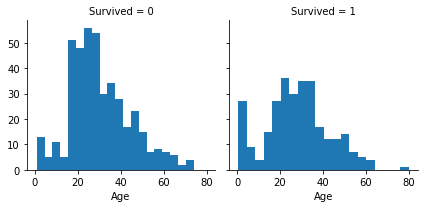

In [46]:
plt.figure(figsize =(10, 6))

g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

- Infants (Age <5) had high survival rate.

- Oldest passengers (Age = 80) survived.

- Large number of 15-25 year olds did not survive.

- Most passengers are in 15-35 age range.

C:\Users\Chail\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


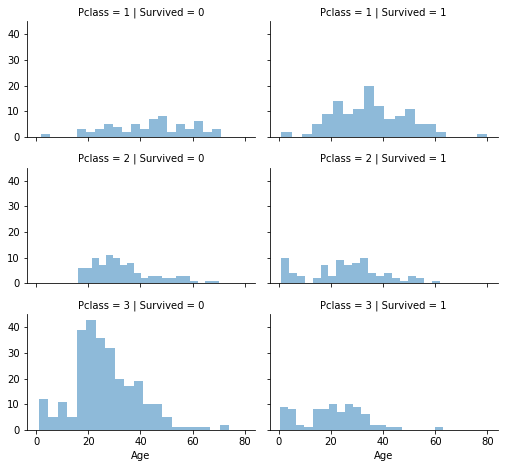

In [47]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

- Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption.
- Most passengers in Pclass=1 survived. Confirms our classifying assumption.
- Pclass varies in terms of Age distribution of passengers.

In [48]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

"dtypes" is used to check the data type of each column. We can see Survived, Pclass, SibSp, Parch are int type where there should be of object type because they are falling into categorical variables. So we have to convert them.

In [49]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Check the distribution of Fare features.

(array([336., 179., 136.,  64.,  15.,  39.,  17.,  29.,  15.,   8.,   4.,
          7.,   4.,   7.,   2.,   7.,   2.,   0.,   0.,   0.,   0.,   4.,
          5.,   0.,   2.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
        440., 450., 460., 470., 480., 490., 500., 510., 520.]),
 <BarContainer object of 52 artists>)

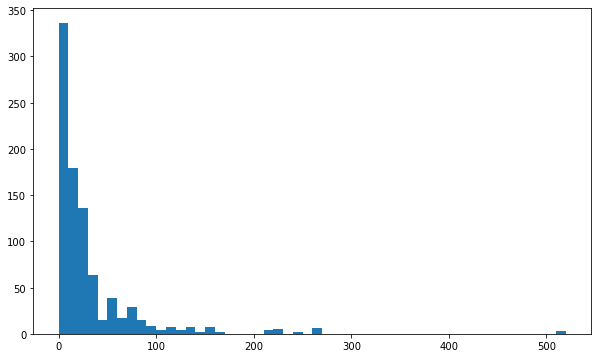

In [50]:
bins = np.arange(0, train_data["Fare"].max()+10, 10)
plt.figure(figsize=(10,6))
plt.hist(data=train_data, x="Fare", bins=bins)

While analysing we can see that the Fare column is Right skewed. And large number of passengers paid 50 dollars or less for their ticket.

(0.0, 100.0)

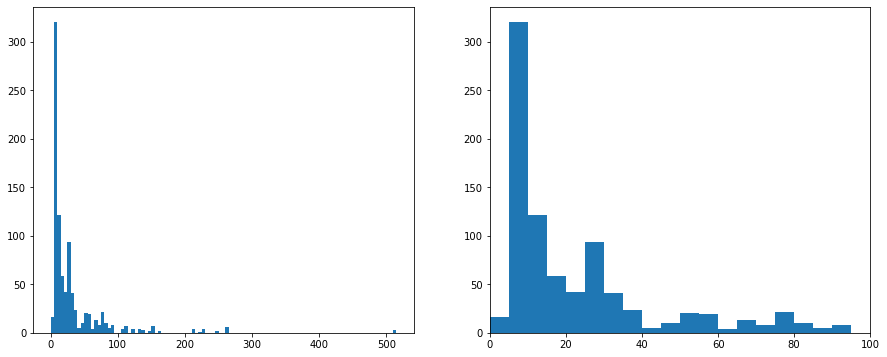

In [51]:
plt.figure(figsize = (15, 6))

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, train_data['Fare'].max()+5, 5)
plt.hist(data = train_data, x = 'Fare', bins = bin_edges)

# histogram on right: focus in on bulk of data < 100
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, train_data["Fare"].max()+5, 5)
plt.hist(data = train_data, x = 'Fare', bins = bin_edges)
plt.xlim(0, 100)

Side by side representation of Fare.
Here on the left side we have full graph for Fare and on the right we set the limit between 0-100 for Fare, where more frequency in data is available.

In [52]:
train_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [53]:
npsqrt_fare = np.sqrt(train_data["Fare"])
npsqrt_fare

0      2.692582
1      8.442944
2      2.815138
3      7.286975
4      2.837252
         ...   
886    3.605551
887    5.477226
888    4.842520
889    5.477226
890    2.783882
Name: Fare, Length: 891, dtype: float64

Square root transformation of Fare column to convert it into normal distribution.

In [54]:
npsqrt_fare.describe()

count    891.000000
mean       4.851220
std        2.946119
min        0.000000
25%        2.812542
50%        3.801868
75%        5.567764
max       22.634690
Name: Fare, dtype: float64

(array([294., 397., 110.,  59.,  15.,  13.,   0.,   3.]),
 array([ 0.  ,  2.94,  5.88,  8.82, 11.76, 14.7 , 17.64, 20.58, 23.52]),
 <BarContainer object of 8 artists>)

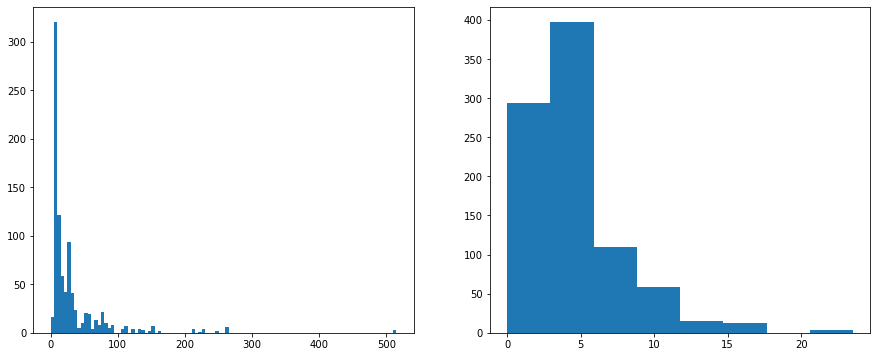

In [55]:
plt.figure(figsize = (15, 6))

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, train_data['Fare'].max()+5, 5)
plt.hist(data = train_data, x = 'Fare', bins = bin_edges)

# histogram on right: square root transformation
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, npsqrt_fare.max()+2.94, 2.94)
plt.hist(npsqrt_fare, bins = bin_edges)

The distribution in both the plots are right skewed.

Text(0, 0.5, 'Frequency')

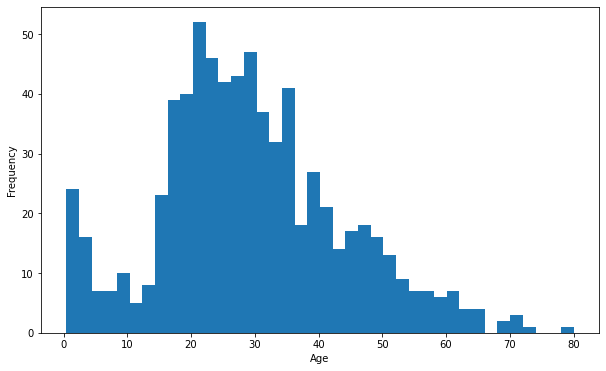

In [56]:
plt.figure(figsize=(10,6))
plt.hist(data=train_data, x="Age", bins=40)
plt.xlabel("Age")
plt.ylabel("Frequency")

Age distribution of the passengers. There are infants < 5 years and there are senior citizens aged 80 also(highest age).
Large number of passengers fall between 15-35 age.

In [57]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

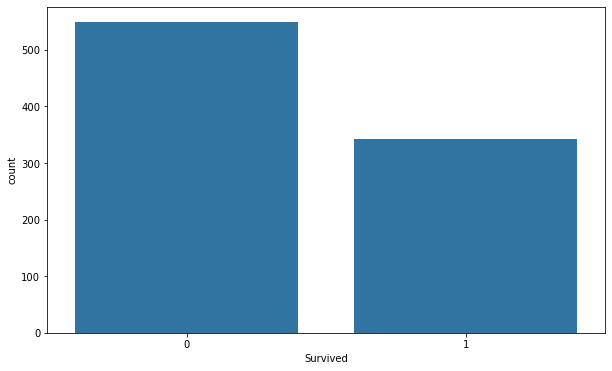

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(x="Survived", data=train_data, color=base_color)

In the above graph the number of people survived is denoted by 1. Which is less than the people died.

<AxesSubplot:xlabel='Survived', ylabel='count'>

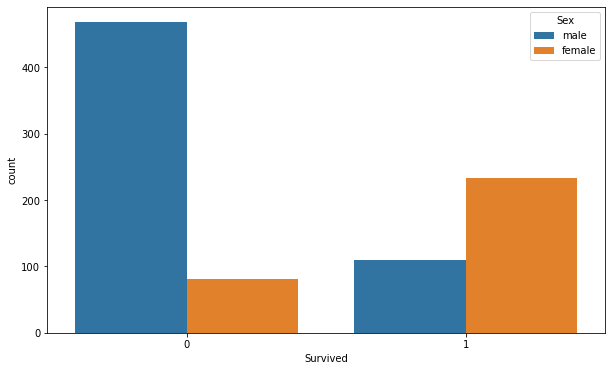

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x="Survived", hue="Sex", data=train_data)

The plot gives us knowledge about how many people survived/died and in them how many were male/female.

<AxesSubplot:xlabel='Survived', ylabel='count'>

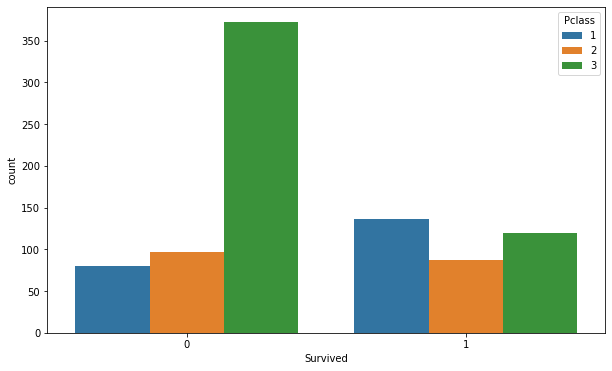

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(x="Survived", hue="Pclass", data=train_data)

The plot illustrates passengers in different class survived or not.

<AxesSubplot:xlabel='Survived', ylabel='count'>

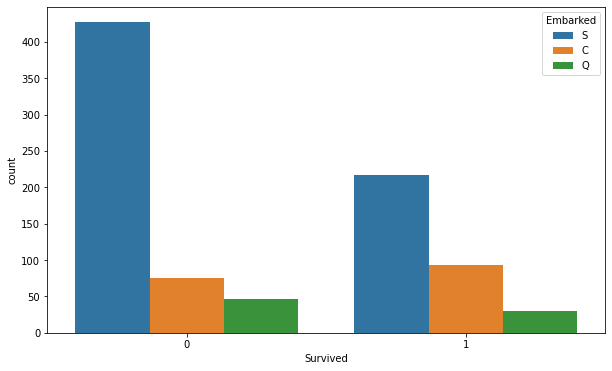

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x="Survived", hue="Embarked")

Plot to depict passengers who survived/died based on where they embarked from.

Large number of passengers died who embarked from S.

In [62]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
log_data = np.log(train_data["Fare"])
print(log_data)
#log_data.describe()

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64


C:\Users\Chail\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Age', ylabel='Fare'>

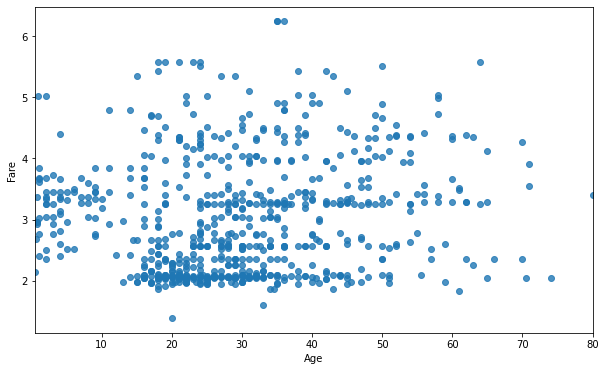

In [64]:
plt.figure(figsize=(10,6))
sns.regplot(data=train_data, x="Age", y=log_data)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

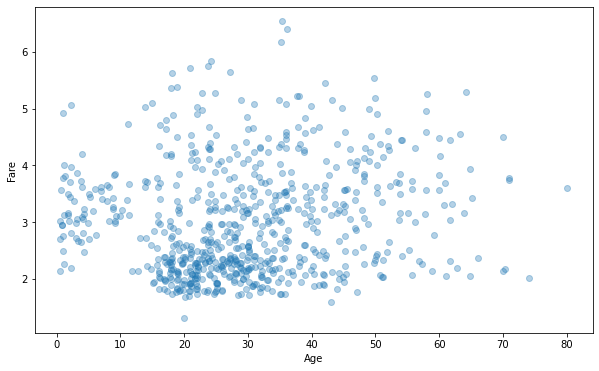

In [65]:
plt.figure(figsize=(10,6))
sns.regplot(data=train_data, x="Age", y=log_data, fit_reg = False, x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha':1/3})

Using jitter and transparency to obtain some insights, we can see there is no special relationship. From the age distribution we knew that lot number of people have ages between 15-35 years, so there are scatter points at that space. The scatter points are seen plotted throughtout.

Age distribution of people who survived or not.

<Figure size 1080x432 with 0 Axes>

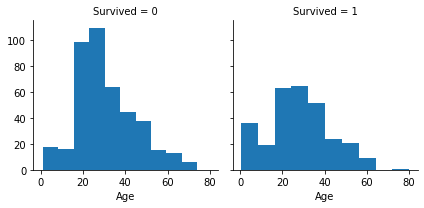

In [66]:
plt.figure(figsize=(15,6))
g = sns.FacetGrid(data=train_data, col="Survived")
g.map(plt.hist, "Age")

In [67]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

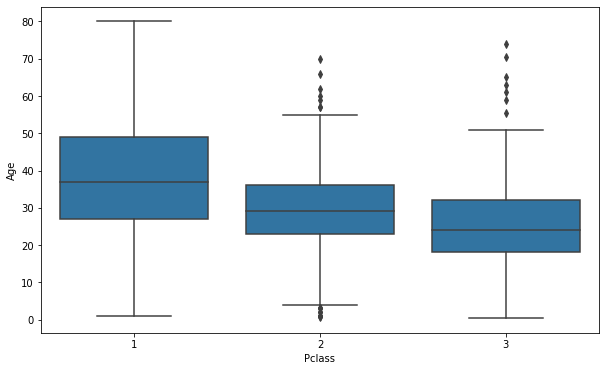

In [68]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_data, x="Pclass", y="Age", color=base_color)

We can infer older passengers tend to travel in first class. While there are some outliers in class-2 and class-3 ie they have some old passengers, but passengers in class-1 who are old tend to be wealthier.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

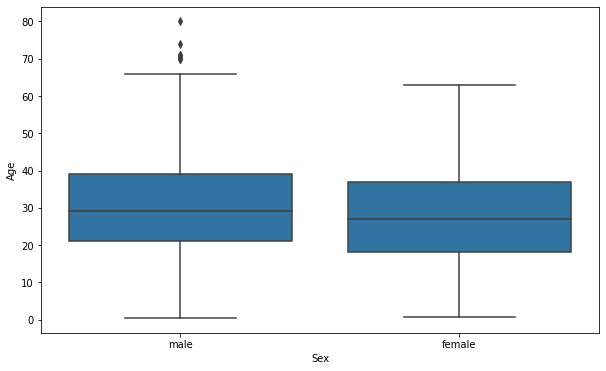

In [69]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_data, x="Sex", y="Age", color=base_color)

Male and Female passengers are somewhat of same age, having male passengers some outliers.

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

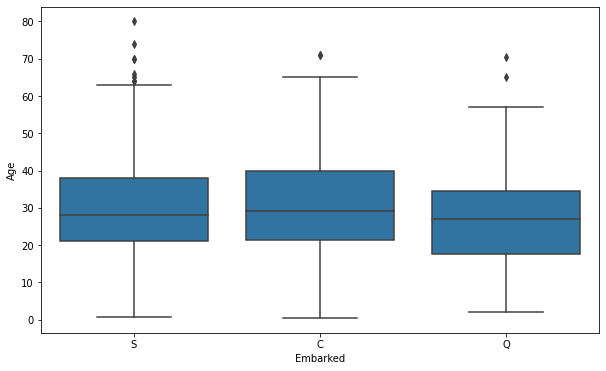

In [70]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_data, x="Embarked", y="Age", color=base_color)

Passengers from S have more age outliers than C and Q combined.

In [71]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Age'>

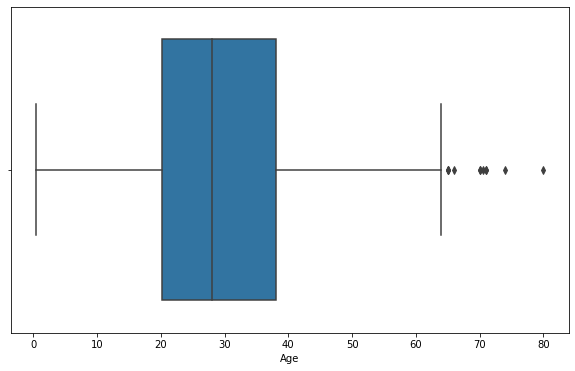

In [72]:
plt.figure(figsize=(10,6))

sns.boxplot(x=train_data["Age"])

<AxesSubplot:xlabel='Fare'>

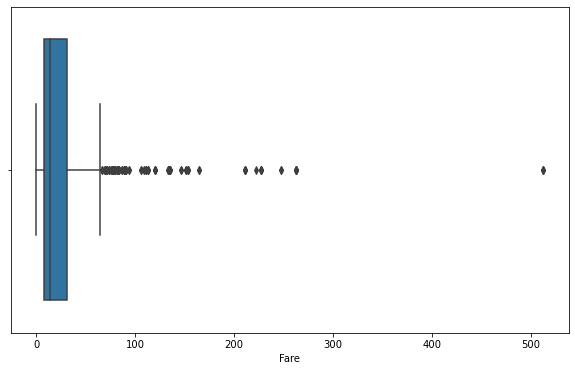

In [73]:
plt.figure(figsize=(10,6))

sns.boxplot(x=train_data["Fare"])

We can see there are outliers in numerical columns. We will treat them later.

### Correlation

<AxesSubplot:>

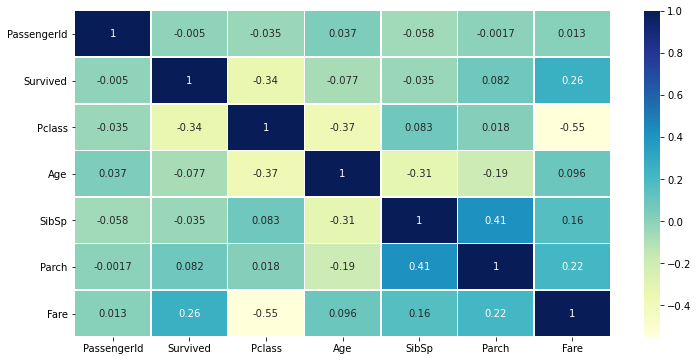

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(train_data.corr(), cmap="YlGnBu", annot=True, linewidths=.5)

We can infer that
- Pclass and Survived are negatively correlated.
- Age and Pclass are negatively correlated.
- SibSp and Age are negatively correlated.
- Fare and Pclass are negatively correlated.

We can perform some analysis further and again check for correlation.

### Data Cleaning

We want to fill in missing age data instead of just dropping the missing age rows. One way to do this is by filling in the mean age of all passengers(imputation). However we can be smarter about this and check the average age by passenger class.

We'll use these average Age values to impute based on the Pclass for Age.

In [75]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Now apply the above function

In [76]:
train_data["Age"] = train_data[["Age", "Pclass"]].apply(impute_age,axis=1)

Now, let's check the heatmap again!

<AxesSubplot:>

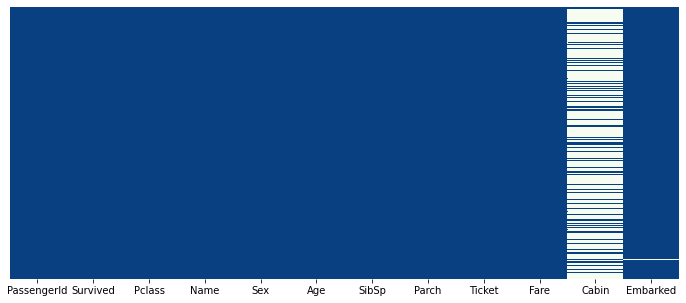

In [77]:
plt.figure(figsize=(12,5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="GnBu_r")

Great! Let's go ahead and drop the Cabin column and row in Embarked column that is NaN

In [78]:
train_data.drop("Cabin", axis=1, inplace=True)

In [79]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [80]:
train_data.dropna(inplace=True)

## Perform outlier removal > then move to scaling > then change categorical features to numerical features.

### Outlier handling

##### For skewed dataset.

<AxesSubplot:xlabel='Fare'>

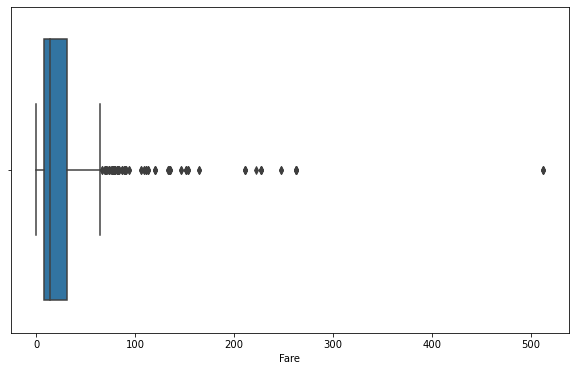

In [81]:
plt.figure(figsize=(10,6))

sns.boxplot(x=train_data["Fare"])

In [82]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=train_data.Fare.quantile(0.75)-train_data.Fare.quantile(0.25)

In [83]:
lower_bridge=train_data['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=train_data['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.7605
65.6563


(None, None)

In [84]:
#### Extreme outliers
lower_bridge=train_data['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=train_data['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.4168
100.3126


(None, None)

##### For normal distribution

<AxesSubplot:xlabel='Age'>

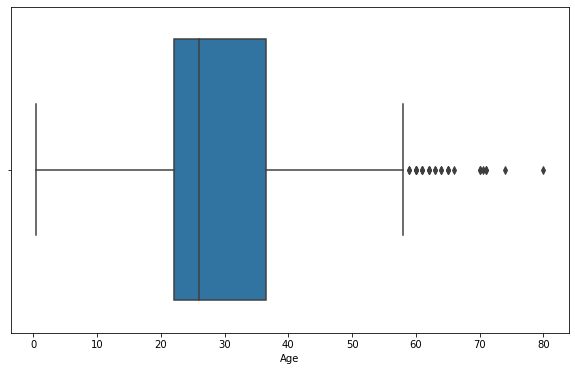

In [85]:
plt.figure(figsize=(10,6))

sns.boxplot(x=train_data["Age"])

In [86]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=train_data['Age'].mean() + 3* train_data['Age'].std()
lower_boundary=train_data['Age'].mean() - 3* train_data['Age'].std()
print(lower_boundary), print(uppper_boundary),print(train_data['Age'].mean())

-10.610128904526597
68.64875657606765
29.019313835770525


(None, None, None)

In [87]:
data = train_data.copy()

In [88]:
data.loc[data['Fare']>=100,'Fare']=100

In [89]:
data.loc[data['Age']>=69,'Age']=69

In [90]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Feature selection

In [91]:
data_FS = data.copy()

In [92]:
data_FS.drop(["PassengerId"], axis=1, inplace=True)

In [93]:
data_FS.drop(["Name", "Ticket"], axis=1, inplace=True)

In [94]:
data_FS_cat = data_FS[["Pclass", "Sex", "SibSp", "Parch", "Embarked"]]
data_FS_cat.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S


In [95]:
data_FS_num = data_FS[["Age", "Fare"]]
data_FS_num.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [96]:
data_FS_cat["Sex"] = np.where(data_FS_cat['Sex']=="male",1,0)

<ipython-input-96-1cd2689ba845>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FS_cat["Sex"] = np.where(data_FS_cat['Sex']=="male",1,0)


In [97]:
data_FS_cat.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,1,1,0,S
1,1,0,1,0,C
2,3,0,0,0,S
3,1,0,1,0,S
4,3,1,0,0,S


In [98]:
### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(data_FS_cat['Embarked'].unique(), 0)}

In [99]:
data_FS_cat['Embarked'] = data_FS_cat['Embarked'].map(ordinal_label)

<ipython-input-99-5c31ac96e8e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FS_cat['Embarked'] = data_FS_cat['Embarked'].map(ordinal_label)


In [100]:
data_FS_cat.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,1,1,0,0
1,1,0,1,0,1
2,3,0,0,0,0
3,1,0,1,0,0
4,3,1,0,0,0


In [101]:
### train_test_split for feature selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_FS_cat,
                                              data_FS['Survived'],test_size=0.3,random_state=75)

In [102]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Embarked
262,1,1,1,1,0
181,2,1,0,0,1
511,3,1,0,0,0
69,3,1,2,0,0
525,3,1,0,0,2


In [103]:
### there should be no null values
X_train.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [104]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [105]:
f_p_values

(array([18.84758724, 67.53465378,  1.09538699, 10.3113224 ,  7.69638109]),
 array([1.41590087e-05, 2.07016319e-16, 2.95280701e-01, 1.32216507e-03,
        5.53316544e-03]))

##### Here we have two arrays, first one is F_score and second is p-value

- The higher the F_score more important the feature is.
- The lower the p_value more important the feature is.

In [106]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

Pclass      1.415901e-05
Sex         2.070163e-16
SibSp       2.952807e-01
Parch       1.322165e-03
Embarked    5.533165e-03
dtype: float64

In [107]:
p_values.sort_values(ascending=True)

Sex         2.070163e-16
Pclass      1.415901e-05
Parch       1.322165e-03
Embarked    5.533165e-03
SibSp       2.952807e-01
dtype: float64

In [108]:
f_score = pd.Series(f_p_values[0], index=X_train.columns)
f_score

Pclass      18.847587
Sex         67.534654
SibSp        1.095387
Parch       10.311322
Embarked     7.696381
dtype: float64

In [109]:
f_score.sort_values(ascending=False)

Sex         67.534654
Pclass      18.847587
Parch       10.311322
Embarked     7.696381
SibSp        1.095387
dtype: float64

Here we can see **Sex, Pclass, Parch, Embarked** are important categorical features.

In [110]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [111]:
data.drop(["PassengerId"], axis=1, inplace=True)

In [112]:
data.drop(["Name", "Ticket"], axis=1, inplace=True)

In [113]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Dropping SibSp feature because it has no importance.

In [114]:
data.drop(["SibSp"], axis=1, inplace=True)

In [115]:
data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S


### Converting Categorical Features

We need to convert our categorical features into dummy variables using pandas. Or else our machine learning algorithm won't be able to directly take in those features as input.

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.6+ KB


Here's how the dummy data looks like after get_dummies().

In [117]:
pd.get_dummies(data["Embarked"], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [118]:
data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [119]:
sex = pd.get_dummies(data["Sex"])
embark = pd.get_dummies(data["Embarked"])
pclass = pd.get_dummies(data["Pclass"])
parch = pd.get_dummies(data["Parch"])

In [120]:
data.drop(["Sex", "Embarked", "Pclass", "Parch"], axis=1, inplace=True)

In [121]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [122]:
data = pd.concat([data, sex, embark, pclass, parch], axis=1)

In [123]:
data.head()

,Survived,Age,Fare,female,male,C,Q,S,1,2,3,0,1,2,3,4,5,6
0,0,22.0,7.2500,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0
1,1,38.0,71.2833,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
3,1,35.0,53.1000,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0
4,0,35.0,8.0500,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0


In [124]:
data["Fare"] = npsqrt_fare
data.head()

,Survived,Age,Fare,female,male,C,Q,S,1,2,3,0,1,2,3,4,5,6
0,0,22.0,2.692582,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0
1,1,38.0,8.442944,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,1,26.0,2.815138,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
3,1,35.0,7.286975,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0
4,0,35.0,2.837252,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0


In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
fare = pd.DataFrame(data[['Fare', 'Age']])

# Normalization
min_max_scaler = MinMaxScaler()
newfare = min_max_scaler.fit_transform(fare)
data[['Fare', 'Age']] = newfare

In [127]:
data.head()

,Survived,Age,Fare,female,male,C,Q,S,1,2,3,0,1,2,3,4,5,6
0,0,0.314669,0.118958,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0
1,1,0.547973,0.373009,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,1,0.372995,0.124373,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
3,1,0.504229,0.321938,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0
4,0,0.504229,0.125350,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0


In [128]:
data.dtypes

Survived      int64
Age         float64
Fare        float64
female        uint8
male          uint8
C             uint8
Q             uint8
S             uint8
1             uint8
2             uint8
3             uint8
0             uint8
1             uint8
2             uint8
3             uint8
4             uint8
5             uint8
6             uint8
dtype: object

### Correlation

Performing correlation we tell us what all factors are related to each other, like Survived and Female are correlated.

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(), cmap="YlGnBu", annot=True, linewidths=.5)

- Above heatmap tells us females are highly correlated to survived and males are inversely corellated.
- 1st class passengers are highly correlated to fare

The data is ready to be used in the model.

# Building the model

In [130]:
import warnings
warnings.filterwarnings('ignore')

In [131]:
X = data.drop("Survived", axis=1)

In [132]:
Y = data["Survived"]

**Cross Validation KFOLD**

In [133]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [134]:
kf = KFold(n_splits = 5)

In [135]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(solver = "liblinear")

In [136]:
result = cross_val_score(log_reg_model , X, Y, cv = kf)

In [137]:
print("Average accuracy for Logistic Regression {}".format(result.mean()))

Average accuracy for Logistic Regression 0.7897098965276454


In [138]:
from sklearn.svm import SVC
svm_model = SVC()

In [139]:
result_svc = cross_val_score(svm_model, X, Y, cv = kf)

In [140]:
print("Average accuracy for Support Vector Classifier {}".format(result_svc.mean()))

Average accuracy for Support Vector Classifier 0.8043039421062655


In [141]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()

In [142]:
result_dtc = cross_val_score(dtc_model, X, Y, cv = kf)

In [143]:
print("Average accuracy for Decision Tree Classifier {}".format(result_dtc.mean()))

Average accuracy for Decision Tree Classifier 0.7806386085190123


In [144]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=1000)

In [145]:
result_rfc = cross_val_score(rfc_model, X, Y, cv = kf)

In [146]:
print("Average accuracy for Random Forest Classifier {}".format(result_rfc.mean()))

Average accuracy for Random Forest Classifier 0.8031676506062337


#### Decision Tree with parameters.

In [ ]:
train_accuracies = [0.5]
test_accuracies = [0.5]

In [ ]:
for depth in range(1, 20):
  dtc_model_param = DecisionTreeClassifier(max_depth=depth)
  dtc_model_param.fit(x_train, y_train)
  train_predictions = dtc_model_param.predict(x_train)
  test_predictions = dtc_model_param.predict(x_test)
  train_accuracy = accuracy_score(y_train, train_predictions)
  test_accuracy = accuracy_score(y_test, test_predictions)
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 21, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [ ]:
dtc_model_maxDepth_three = DecisionTreeClassifier(max_depth=3)

In [ ]:
dtc_model_maxDepth_three.fit(x_train, y_train)

In [ ]:
confusion_matrix(y_test, dtc_model_maxDepth_three.predict(x_test))

In [ ]:
accuracy_score(y_test, dtc_model_maxDepth_three.predict(x_test))

In [ ]:
#### check overfitting or underfitting
dtcmodel_fitting_check = dtc_model_maxDepth_three.predict(x_train)

In [ ]:
accuracy_score(y_train, dtcmodel_fitting_check)

Perfect fit for **Decision Tree Classifier** with max_depth=3

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

In [ ]:
confusion_matrix(y_test, svm_model.predict(x_test))

In [ ]:
accuracy_score(y_test, svm_model.predict(x_test))

##### Overfitting / Underfitting

In [ ]:
svcmodel_fitting_check = svm_model.predict(x_train)

In [ ]:
accuracy_score(y_train, svcmodel_fitting_check)

**Support Vector Classifier** seems to have no overfitting or underfitting.

##### Support Vector with parameters

In [ ]:
train_accuracies_svc = [0.5]
test_accuracies_svc = [0.5]

In [ ]:
for C in np.arange(1.0, 10.5, 0.5):
  svc_model_param = SVC(C=C)
  svc_model_param.fit(x_train, y_train)
  train_predictions = svc_model_param.predict(x_train)
  test_predictions = svc_model_param.predict(x_test)
  train_accuracy = accuracy_score(y_train, train_predictions)
  test_accuracy = accuracy_score(y_test, test_predictions)
  train_accuracies_svc.append(train_accuracy)
  test_accuracies_svc.append(test_accuracy)

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies_svc, label="train accuracy")
plt.plot(test_accuracies_svc, label="test accuracy")
plt.legend(loc="bottom right", prop={'size': 15})
plt.xticks(np.arange(1.0, 10.5, 0.5))
plt.xlabel("C-Value", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [ ]:
svc_model_c = SVC(C=1.0)

In [ ]:
svc_model_c.fit(x_train, y_train)

In [ ]:
confusion_matrix(y_test, svc_model_c.predict(x_test))

In [ ]:
accuracy_score(y_test, svc_model_c.predict(x_test))

In [ ]:
#### check overfitting or underfitting
svcmodel_fitting_check_for_c = svc_model_c.predict(x_train)

In [ ]:
accuracy_score(y_train, svcmodel_fitting_check_for_c)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc_model = RandomForestClassifier(n_estimators=1000)

rfc_model.fit(x_train,y_train)

In [ ]:
confusion_matrix(y_test, rfc_model.predict(x_test))

In [ ]:
accuracy_score(y_test, rfc_model.predict(x_test))

##### Underfitting / Overfitting

In [ ]:
rfc_model_fitting_check = rfc_model.predict(x_train)

In [ ]:
accuracy_score(y_train, rfc_model_fitting_check)

**Random Forest Classifier** model seems to have overfitting problem

## Grid Search

### using above models

In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20, random_state=83)

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
# Logistic Regression
logistic_parameters = [
    {
        'penalty':('none', 'l1', 'l2', 'elasticnet'),
        'C':[0.1, 0.5, 1.0, 2.0, 5.0, 10],
        'fit_intercept': [True, False],
        'solver': ('liblinear', 'sag', 'saga')
    }
]

In [152]:
logistic_model = LogisticRegression()
logistic_grid = GridSearchCV(logistic_model, param_grid=logistic_parameters, scoring="accuracy",cv=10)

In [153]:
logistic_grid_fit = logistic_grid.fit(X,Y)

In [154]:
logistic_grid_fit.best_params_

{'C': 2.0, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}

In [156]:
logistic_model_hyperparameter = LogisticRegression(C=2.0, fit_intercept=True, penalty="l1", solver="liblinear")
logistic_model_hyperparameter.fit(X_train, Y_train)

LogisticRegression(C=2.0, penalty='l1', solver='liblinear')

In [157]:
logistic_predict = logistic_model_hyperparameter.predict(X_test)

In [160]:
confusion_matrix(Y_test, logistic_predict)

array([[12,  2],
       [ 1,  5]], dtype=int64)

In [162]:
accuracy_score(Y_test, logistic_predict)

0.85

In [164]:
# Support Vector Machine
support_vector_parameters = [
    {
        'C':[0.01, 0.1, 10],
        'kernel':('linear', 'poly', 'rbf')
    }
]

In [165]:
support_model = SVC()
support_grid = GridSearchCV(support_model, param_grid=support_vector_parameters, cv=10)

In [166]:
support_grid_fit = support_grid.fit(X,Y)

In [167]:
support_grid_fit.best_params_

{'C': 10, 'kernel': 'rbf'}

In [168]:
support_model_b = SVC(C=10, kernel="rbf")
support_model_b.fit(X_train, Y_train)

SVC(C=10)

In [169]:
support_predict = support_model_b.predict(X_test)

In [170]:
confusion_matrix(Y_test, support_predict)

array([[14,  0],
       [ 1,  5]], dtype=int64)

In [171]:
accuracy_score(Y_test, support_predict)

0.95

##### Decision Tree Classifier

In [174]:
# Decision Tree Classifier
dtc_parameters = [
    {
        'criterion': ('gini', 'entropy'),
        'splitter': ('best', 'random'),
        'max_depth': [3, 4, 5]
    }
]

In [175]:
dtc_model_hyperparameter = DecisionTreeClassifier()
dtc_grid = GridSearchCV(dtc_model_hyperparameter, param_grid=dtc_parameters, cv=10)

In [176]:
dtc_grid_fit = dtc_grid.fit(X,Y)

In [177]:
dtc_grid_fit.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}

In [179]:
dtc_model_best = DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='best')
dtc_model_best.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [180]:
dtc_best_predict = dtc_model_best.predict(X_test)

In [181]:
confusion_matrix(Y_test, dtc_best_predict)

array([[13,  1],
       [ 1,  5]], dtype=int64)

In [182]:
accuracy_score(Y_test, dtc_best_predict)

0.9

In [186]:
# Random Forest Classifier
random_forest_parameters = [
    {
        'n_estimators':[100, 500, 1000, 2000],
        'criterion':('gini', 'entropy'),
        'max_depth': [3]
    }
]

In [187]:
random_forest_model_hyperparameter = RandomForestClassifier()
random_forest_grid = GridSearchCV(random_forest_model_hyperparameter, param_grid=random_forest_parameters, cv=10)

In [188]:
random_forest_grid_fit = random_forest_grid.fit(X,Y)

In [189]:
random_forest_grid_fit.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 2000}

In [190]:
random_forest_model_best = RandomForestClassifier(criterion="entropy", max_depth=3, n_estimators=2000)
random_forest_model_best.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=2000)

In [191]:
random_forest_predict = random_forest_model_best.predict(X_test)

In [192]:
confusion_matrix(Y_test, random_forest_predict)

array([[13,  1],
       [ 1,  5]], dtype=int64)

In [193]:
accuracy_score(Y_test, random_forest_predict)

0.9